In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import os

# Verify file existence (optional)
if os.path.exists("movie_review.csv"):
    print("File found!")
    data = pd.read_csv("movie_review.csv")
else:
    print("Error: File not found!")
# Cargar el conjunto de datos


# Preprocesamiento de datos
# Supongamos que tienes una columna 'texto' con las reseñas y una columna 'etiqueta' con las etiquetas (0 para negativo, 1 para positivo).
# Separar los datos en características (X) y etiquetas (y)
X = data['text']
y = data['tag']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Paso 4: Vectorización de texto
vectorizer = TfidfVectorizer(max_features=5000) # Convertir el texto en características numéricas (TF-IDF)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Paso 5: Entrenar un modelo de clasificación
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print("Informe de clasificación:")
print(report)

File found!
Precisión del modelo: 0.6697311495673671
Informe de clasificación:
              precision    recall  f1-score   support

         neg       0.67      0.65      0.66      6371
         pos       0.67      0.69      0.68      6573

    accuracy                           0.67     12944
   macro avg       0.67      0.67      0.67     12944
weighted avg       0.67      0.67      0.67     12944



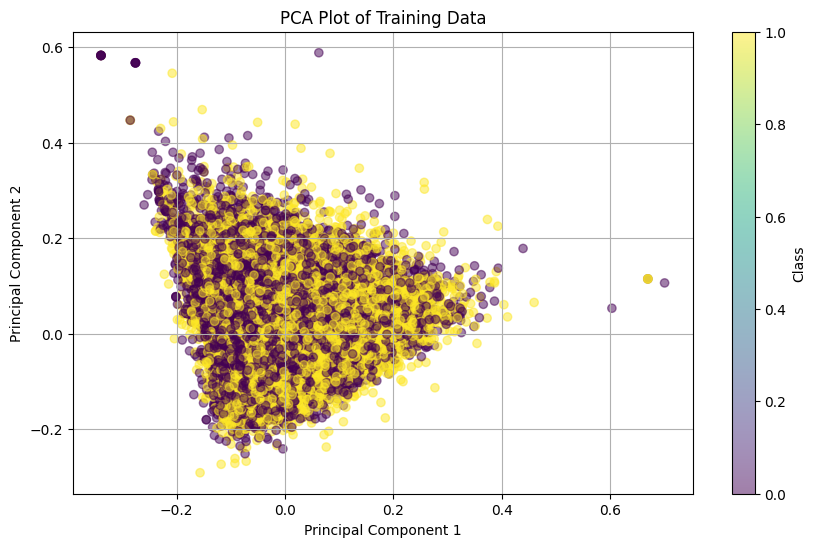

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas de clase de cadenas a números
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.toarray())

# Graficar los datos en 2 dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.5)
plt.title('PCA Plot of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()
